# Balanceamento - Smote e Near miss

In [34]:
# importação dos pacotes que serão utilizados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
diabetes =  pd.read_csv("arquivo.csv", sep = ',', encoding = 'UTF-8')

In [36]:
# Mostra os atributos de 3 registros
diabetes.head(5)

,RIDAGEYR,URXUMA,URXCRS,LBDSCHSI,LBDSGLSI,LBXSGL,LBXGH,BMXWT,BMXHT,BMXWAIST,CLASSE
0,60,8.3,21127.6,6.362,4.77,86,5.9,120.2,166.7,124.1,0
1,56,3.1,5922.8,5.327,4.88,88,5.2,48.8,157.5,71.4,0
2,36,11.8,22011.6,6.258,4.61,83,5.1,57.9,179.1,76.0,0
3,13,-1.0,-1.0,-1.000,-1.00,-1,-1.0,-1.0,-1.0,-1.0,0
4,77,29.8,17149.6,5.612,5.44,98,5.5,69.9,163.4,94.2,0


In [37]:
# Mostra o shape do dataset
diabetes.shape

(20117, 11)

# Avaliação de Modelos Preditivos

## Amostragem - Resampling

Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados. A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado. Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como métodos de amostragem que permitem você estimar quão bem seu modelo irá fazer previsões em novos dados.

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos "Conjunto de dados de treino e de teste".

### Dados de Treino e de Teste

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. 

Dividimos nossos dados originais em dados de treino e de teste. 

Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. 

A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. 

O ponto negativo é a possibilidade de alta variância.

## Avaliando a Performance


As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. 

### Métricas para Algoritmos de Classificação

Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html.

In [38]:
# Importando os módulos necessários

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Algoritmo Regressão Logística (Classificação do Aprendizado de Máquina Supervisionado)
# utilizado para ilustração
from sklearn.linear_model import LogisticRegression

In [39]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
diabetes =  pd.read_csv("modelo.csv", sep = ',', encoding = 'UTF-8')

In [40]:
# Mostra o shape (formato) do dataset
diabetes.shape

(20117, 11)

In [41]:
# Apresenta a quantidade de objetos de cada classe
# Observe-se que para dados desbalanceados, o algoritmo de Machine Learning aprenda mais sobre a classe majoritária 
# e menos da classe minoritária 
#Obs: no dataset utilizado, a variável "CLASSE" estava gravada com letras maiúsculas
diabetes.CLASSE.value_counts()

0    18175
1     1942
Name: CLASSE, dtype: int64

In [42]:
# Carregando os dados
array = diabetes.values

In [43]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:19] # todos os objetos do atributo 0 ao atributo 19 (exclusivo)
Y = array[:,19]

In [44]:
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [45]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [46]:
# Criando o objeto que vai obter o modelo 
modelo = LogisticRegression()

In [47]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

LogisticRegression()

In [48]:
# Fazendo as previsões e construindo a Matriz de Confusão
previsoes = modelo.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

In [49]:
# construindo o relatório de resultados
report = classification_report(Y_teste, previsoes)

In [50]:
# Score do modelo nos dados de teste  (Acurácia)
result = modelo.score(X_teste, Y_teste)

In [51]:
# Imprime os resultados
# Quando os dados estão desbalanceados para as classes, a acurácia não é uma boa métrica
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 83.522%


In [52]:
# Imprimindo a Matriz de Confusão
# Veja como a matriz de confusão mostra a grande quantidade de Falsos positivos (FP) para a classe "1"
print(matrix)

[[5479  515]
 [ 579   66]]


In [53]:
# Imprimindo o relatório
# Observe o recall para ambas as classes "0" (100%) e "1" (1%), são muito diferentes
# O algoritmo não aprendeu quase nada da classe '1'
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      5994
         1.0       0.11      0.10      0.11       645

    accuracy                           0.84      6639
   macro avg       0.51      0.51      0.51      6639
weighted avg       0.83      0.84      0.83      6639



# Dados Desbalanceados

## Métodos para lidar com dados desbalanceados
Fonte: https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/.

Undersampling – Consiste em reduzir de forma aleatória os exemplos da classe majoritária.

<font color='red'>NearMiss</font> – É um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância.

Quando instâncias das duas classes estão muito próximas umas das outras, removemos as instâncias da classe majoritária para termos uma maior separabilidade entre as classes.

Oversampling – Consiste em replicar dados aleatórios da classe minoritária. Como estamos duplicando os dados já existentes este método está propício a dar overfitting.

<font color='red'>Smote (<i>Synthetic Minority Over-sampling Technique</i>)</font> – Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. Ele calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados. Se o número de dados gerados for muito grande podemos ter um overfiting.

Engenharia de features – Consiste em gerar novas features dando maior robustez ao modelo e diminuindo o viés da classe majoritária.

In [54]:
# Instalando o módulo !pip install -U imbalanced-learn para fazer o balanceamento
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\lucia\anaconda3\lib\site-packages (0.8.0)


### NearMiss

Método de Undersampling (subamostragem).

Iguala as quantidade de amostras entre as classes.

In [55]:
# Mostra o shape do dataset
diabetes.shape

(20117, 11)

In [56]:
# Importando os módulos necessários
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression

In [57]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
diabetes =  pd.read_csv("arquivo.csv", sep = ',', encoding = 'UTF-8')

In [58]:
# Apresenta a quantidade de objetos de cada classe
diabetes.CLASSE.value_counts()

0    18175
1     1942
Name: CLASSE, dtype: int64

In [59]:
# Carregando os dados
array = diabetes.values

In [60]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:19] # todos os objetos do atributo 0 ao atributo 19 (exclusivo)
Y = array[:,19]

In [61]:
# Mostra os dados de X
X

array([[6.00000e+01, 8.30000e+00, 2.11276e+04, ..., 1.20200e+02,
        1.66700e+02, 1.24100e+02],
       [5.60000e+01, 3.10000e+00, 5.92280e+03, ..., 4.88000e+01,
        1.57500e+02, 7.14000e+01],
       [3.60000e+01, 1.18000e+01, 2.20116e+04, ..., 5.79000e+01,
        1.79100e+02, 7.60000e+01],
       ...,
       [7.20000e+01, 7.20000e+00, 3.71280e+03, ..., 7.46000e+01,
        1.63500e+02, 1.10500e+02],
       [5.10000e+01, 5.60000e+00, 1.18456e+04, ..., 6.00000e+01,
        1.52100e+02, 9.05000e+01],
       [6.40000e+01, 4.41000e+01, 3.69512e+04, ..., 1.75200e+02,
        1.88300e+02, 1.57600e+02]])

In [62]:
# Mostra os dados de Y
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [63]:
# Instância o NearMiss
nr = NearMiss()

In [66]:
# Aplica o NearMiss
X,Y = nr.fit_resample(X,Y)

In [67]:
# Monta o dataset contendo a amostra
# Retornando os valores para o array concatenando todos em um único arrayAtual
import numpy as np
arrayAtual = np.column_stack((X, Y))

In [68]:
# Cria um dataframe a partir do array finalizado
dataframeCriado = pd.DataFrame(arrayAtual)

In [69]:
# Mostra os 5 primeiros registros
dataframeCriado.head()

,0,1,2,3,4,5,6,7,8,9,10
0,76.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1,80.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,80.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,64.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
4,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


In [70]:
# Modifica os nomes das colunas para o nome original
dataframeCriado.columns = diabetes.columns

In [71]:
# Mostra o total de objetos de cada classe
dataframeCriado.CLASSE.value_counts()

1.0    1942
0.0    1942
Name: CLASSE, dtype: int64

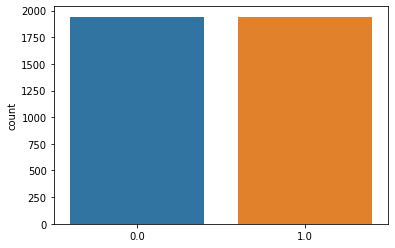

In [72]:
# Checa a quantidade de amostras entre as classes
import seaborn as sns
ax = sns.countplot(x=Y)

In [73]:
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [74]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [75]:
# Criando o objeto que vai obter o modelo 
modelo = LogisticRegression()

In [76]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

LogisticRegression()

In [77]:
# Fazendo as previsões e construindo a Matriz de Confusão
previsoes = modelo.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

In [78]:
# construindo o relatório de resultados
report = classification_report(Y_teste, previsoes)

In [79]:
# Score do modelo nos dados de teste  (Acurácia)
result = modelo.score(X_teste, Y_teste)

In [80]:
# Imprime os resultados
# Quando os dados estão desbalanceados para as classes, a acurácia não é uma boa métrica
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 74.181%


In [81]:
# Imprimindo a Matriz de Confusão
print(matrix)

[[526 127]
 [204 425]]


In [82]:
# Imprimindo o relatório
# Observe o recall para ambas as classes "0" (100%) e "1" (1%), são muito diferentes
# O algoritmo não aprendeu quase nada da classe '1'
print(report)

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       653
         1.0       0.77      0.68      0.72       629

    accuracy                           0.74      1282
   macro avg       0.75      0.74      0.74      1282
weighted avg       0.74      0.74      0.74      1282



In [83]:
# Armazena os dados balanceados por NearMiss
dataframeCriado.to_csv("arquivo_nearmiss.csv", index=False)

### Smote (<i>Synthetic Minority Over-sampling Technique<i>)
    
Gera dados sintéticos da classe minoritária.

In [79]:
# Importando os módulos necessários
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
# Algoritmo Regressão Logística (Classificação do Aprendizado de Máquina Supervisionado)
# utilizado para ilustração
from sklearn.linear_model import LogisticRegression

In [80]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
diabetes = pd.read_csv('resultado.csv', sep = ';', encoding = 'UTF-8')

In [81]:
# Apresenta a quantidade de objetos de cada classe
diabetes.CLASSE.value_counts()

0    19135
1     1370
Name: CLASSE, dtype: int64

In [82]:
# Carregando os dados para um array
array = diabetes.values

In [84]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:19] # todos os objetos do atributo 0 ao atributo 19 (exclusivo)
Y = array[:,19]

In [85]:
# Mostra os dados de X
X

array([[ 1.00000e+05,  2.00000e+00,  2.10000e+01, ...,  7.20000e+01,
        -1.00000e+00, -1.00000e+00],
       [ 1.00001e+05,  1.00000e+00,  3.90000e+01, ...,  9.00000e+01,
         2.24000e+02,  2.52900e+00],
       [ 1.00002e+05,  2.00000e+00,  9.00000e+00, ..., -1.00000e+00,
        -1.00000e+00, -1.00000e+00],
       ...,
       [ 9.99970e+04,  2.00000e+00,  6.40000e+01, ...,  2.00000e+01,
        -1.00000e+00, -1.00000e+00],
       [ 9.99980e+04,  2.00000e+00,  1.00000e+01, ...,  6.20000e+01,
        -1.00000e+00, -1.00000e+00],
       [ 9.99990e+04,  1.00000e+00,  2.50000e+01, ...,  7.80000e+01,
        -1.00000e+00, -1.00000e+00]])

In [86]:
# Mostra os dados de Y
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
# Visualizando a quantidade de dados por classe
np.bincount(Y)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [88]:
# Instância o SMOTE
# Essa técnica possui o parâmetro sampling_strategy que nos permiti definir 
# qual a porcentagem de dados sintéticos que queremos.
# Se definirmos 0.5 por exemplo, ele vai gerar dados sintéticos até 50% da classe majoritária. 
# Mas a título de exemplo será usada o método padrão.
smt = SMOTE()

In [89]:
# Aplica o SMOTE nos dados
X, Y = smt.fit_sample(X, Y)

In [90]:
# Visualizando a distribuição das amostras
np.bincount(Y)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [91]:
# Monta o dataset contendo a amostra
# Retornando os valores para o array concatenando todos em um único arrayAtual
arrayAtual = np.column_stack((X, Y))

# Cria um dataframe a partir do array finalizado
dataframeCriado = pd.DataFrame(arrayAtual)

# Modifica os nomes das colunas para o nome original
dataframeCriado.columns = diabetes.columns

# Mostra os 5 primeiros registros
dataframeCriado.head()

,SEQN1,RIAGENDR,RIDAGEYR,URXUMA,URXUMS,URXUCR,URXCRS,URDACT,LBDHDD,LBDHDDSI,...,LBXSGL,LBDSGLSI,LBXSTR,LBDSTRSI,BPACSZ,BPXSY1,BPXDI1,LBXTR,LBDTRSI,CLASSE
0,100000.0,2.0,21.0,2.7,2.7,46.0,4066.4,5.87,42.0,1.09,...,127.0,3.284,58.0,0.655,4.0,122.0,72.0,-1.0,-1.000,0.0
1,100001.0,1.0,39.0,8.4,8.4,84.0,7425.6,10.00,48.0,1.24,...,190.0,4.913,235.0,2.653,3.0,126.0,90.0,224.0,2.529,0.0
2,100002.0,2.0,9.0,23.1,23.1,186.0,16442.4,12.42,42.0,1.09,...,-1.0,-1.000,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.000,0.0
3,100003.0,2.0,19.0,8.4,8.4,319.0,28199.6,2.63,-1.0,-1.00,...,-1.0,-1.000,-1.0,-1.000,3.0,118.0,62.0,-1.0,-1.000,0.0
4,100004.0,2.0,65.0,3.8,3.8,61.0,5392.4,6.23,57.0,1.47,...,220.0,5.689,116.0,1.310,3.0,164.0,52.0,-1.0,-1.000,0.0


In [92]:
# Mostra o total de objetos de cada classe
dataframeCriado.CLASSE.value_counts()

1.0    19135
0.0    19135
Name: CLASSE, dtype: int64

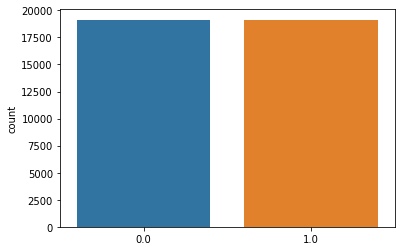

In [93]:
# Checa a quantidade de amostras entre as classes
ax = sns.countplot(x=Y)

In [94]:
# Definindo o tamanho das amostras
teste_size = 0.25

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [95]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [96]:
# Criando o objeto que vai obter o modelo 
modelo = LogisticRegression()

In [97]:
# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

LogisticRegression()

In [98]:
# Fazendo as previsões e construindo a Matriz de Confusão
previsoes = modelo.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

In [99]:
# construindo o relatório de resultados
report = classification_report(Y_teste, previsoes)

In [100]:
# Score do modelo nos dados de teste  (Acurácia)
result = modelo.score(X_teste, Y_teste)

In [101]:
# Imprime os resultados
# Quando os dados estão desbalanceados para as classes, a acurácia não é uma boa métrica
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 81.668%


In [102]:
# Imprimindo a Matriz de Confusão
print (pd.crosstab(Y_teste, previsoes, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0.0   1.0   All
Real                     
0.0      3786   965  4751
1.0       789  4028  4817
All      4575  4993  9568


In [103]:
# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81      4751
         1.0       0.81      0.84      0.82      4817

    accuracy                           0.82      9568
   macro avg       0.82      0.82      0.82      9568
weighted avg       0.82      0.82      0.82      9568



In [54]:
# Armazena os dados balanceados por SMOTE
dataframeCriado.to_csv("arquivo_smote.csv", index=False)

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue">https://orcid.org/0000-0002-6020-7535</font>